In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.mplot3d
import mpl_toolkits.axes_grid1 as plt_ax
import scipy.stats
import itertools
%matplotlib inline

def plot(data, ax=None, enum=False, title='', labels=None, legend=False, **kwargs):
    axes_defined = ax != None
    if not axes_defined:
        fig, ax = plt.subplots(1, 1, figsize=(13, 4))
    plotted = None
    if enum:
        plotted = ax.plot(data, **kwargs)
    else:
        mapping = np.array(data).T
        plotted = ax.plot(mapping[0], mapping[1], **kwargs)
    if labels:
        ax.set_xlabel(labels[0])
        if (len(labels) > 1):
            ax.set_ylabel(labels[1])
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    ax.set_title(title)
    ax.grid(True)
    if not axes_defined:
        fig.tight_layout()
    return ax

def scatter(data, ax=None, enum=False, title='', labels=None, legend=False, colorbar=False, xlim=None, **kwargs):
    axes_defined = ax != None
    if not axes_defined:
        fig, ax = plt.subplots(1, 1, figsize=(13, 4))
    scattered = None
    if enum:
        scattered = ax.scatter(range(len(data)), data, **kwargs)
    else:
        mapping = np.array(data).T
        scattered = ax.scatter(mapping[0], mapping[1], **kwargs)
    if labels:
        ax.set_xlabel(labels[0])
        if (len(labels) > 1):
            ax.set_ylabel(labels[1])
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    if xlim:
        ax.set_xlim(xlim)
    ax.set_title(title)
    ax.grid(True)
    if colorbar:
        cax = plt_ax.make_axes_locatable(ax).append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(scattered, cax=cax)
        cbar.set_ticks([-1, 0, 1])
    if not axes_defined:
        fig.tight_layout()
    return ax

def plot_bars(percentage_matrix, ax, xticks, title='', labels=None, ylim=[0, 101], **kwargs):
    meanlineprops = dict(linewidth=2, color='green')
    ax.boxplot(percentage_matrix.T, meanprops=meanlineprops, meanline=True, **kwargs)
    ax.grid(True)
    ax.set_xticklabels(xticks)
    ax.set_title(title)
    ax.set_ylim(*ylim)
    if labels:
        ax.set_xlabel(labels[0])
        if (len(labels) > 1):
            ax.set_ylabel(labels[1])
    return ax

def plot_all_bars(Ns, train_percentages, test_percentages, train_w1s, train_w2s, train_bs):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))
    plot_bars(train_percentages, ax[0], Ns, title='Classification for training set', labels=['N', '% correct classifications'], showmeans=True)
    plot_bars(test_percentages, ax[1], Ns, title='Classification for test set', labels=['N', '% correct classifications'], showmeans=True)
    fig.tight_layout()

    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    plot_bars(train_w1s, ax[0], Ns, title='w1 out of 50 runs over N', labels=['N', 'w1'], ylim=[-2, 2], showmeans=True)
    plot_bars(train_w2s, ax[1], Ns, title='w2 out of 50 runs over N', labels=['N', 'w2'], ylim=[-2, 2], showmeans=True)
    plot_bars(train_w2s, ax[2], Ns, title='b out of 50 runs over N', labels=['N', 'b'], ylim=[-2, 2], showmeans=True)
    fig.tight_layout()

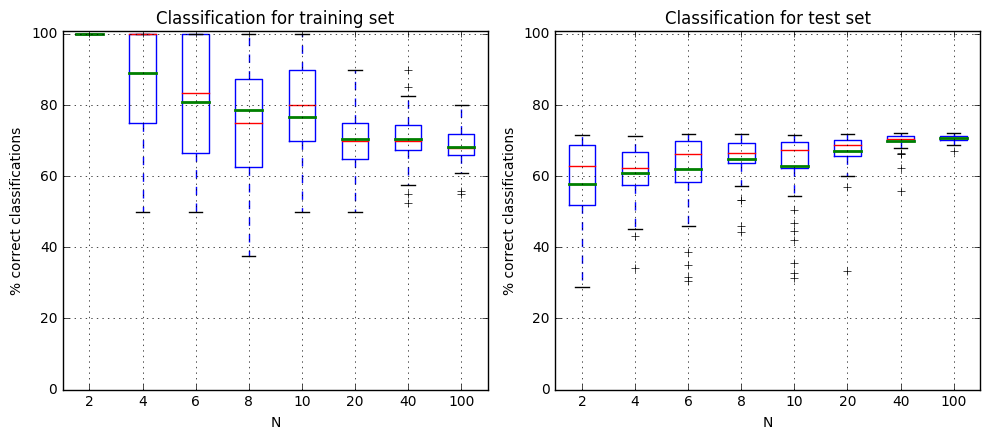

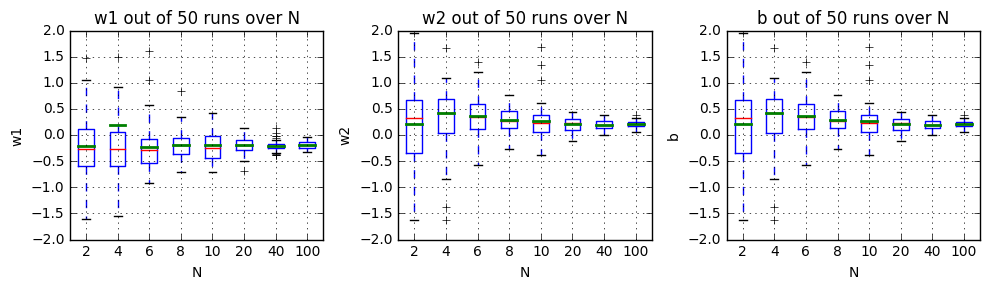

In [165]:
# Exercise 7.2
np.random.seed(0)
def N(mean, variance=0.1, shape=60):
    return np.random.normal(size=[shape, 2], scale=np.sqrt(variance), loc=mean)

def generate_data(n=100):
    halfSize = int(n/2)
    datapoints1 = N([0, 1], variance=2, shape=halfSize)
    datapoints2 = N([1, 0], variance=2, shape=halfSize)
    set1 = np.concatenate([datapoints1.T, np.ones((halfSize, 1)).T]).T
    set2 = np.concatenate([datapoints2.T, -np.ones((halfSize, 1)).T]).T
    return np.concatenate([set1, set2])

def calc_weights(train_set):
    # Use least squares to calculate bias and weights, wb = [bias, w1, w2]
    input_ = np.column_stack((np.ones(train_set.shape[0]), train_set[:, 0], train_set[:, 1]))
    wb = np.linalg.lstsq(input_, train_set[:, 2])[0]
    return wb[0], wb[1:]

test_set = generate_data(1000)
Ns = [2, 4, 6, 8, 10, 20, 40, 100]
train_w1s, train_w2s, train_bs, train_percentages, test_percentages = np.zeros((5, len(Ns), 50))
for i, n in enumerate(Ns):
    train_w1s_runs, train_w2s_runs, train_bs_runs, train_percentages_runs, test_percentages_runs = np.zeros((5, 50))
    for j in range(50):
        # Train weights using the training set
        train_set = generate_data(n)
        b, w = calc_weights(train_set)
        train_yT = np.sign(w.T.dot(train_set.T[:2]) + b)
        train_percentages_runs[j] = 100 * np.sum(train_yT == train_set[:, 2]) / train_set.shape[0]
        train_w1s_runs[j], train_w2s_runs[j] = w
        train_bs_runs[j] = b
        # Evaluate trained weigths on the test set
        test_yT = np.sign(w.T.dot(test_set.T[:2]) + b)
        test_percentages_runs[j] = 100 * np.sum(test_yT == test_set[:, 2]) / test_set.shape[0]
    # Store all 50 runs in 
    train_w1s[i], train_w2s[i], train_bs[i] = train_w1s_runs, train_w2s_runs, train_bs_runs
    train_percentages[i], test_percentages[i] = train_percentages_runs, test_percentages_runs

plot_all_bars(Ns, train_percentages, test_percentages, train_w1s, train_w2s, train_bs)

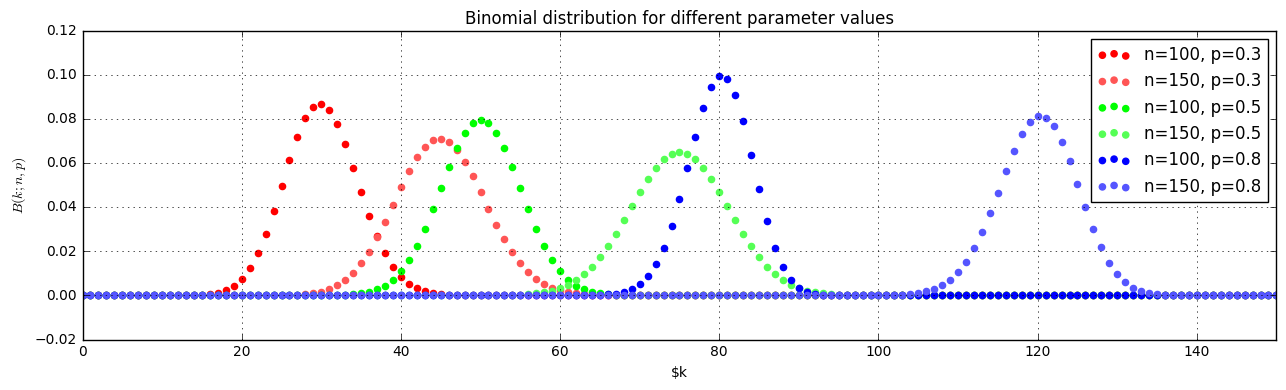

In [79]:
# Exercise 7.3 (a)
ks = np.array(range(151))
ns = np.array([100, 150])
ps = np.array([0.3, 0.5, 0.8])
ax = None
for p, n in itertools.product(ps, ns):
    color = (ps == p) * 1.0  # 0.3 == red, 0.5 == green, 0.8 == blue
    color[color == 0] = (n - ns[0]) / ns[1]  # scale color by n
    # n trials, k success, p success probability
    ax = scatter(sp.stats.binom(n, p).pmf(ks), ax, enum=True, color=color,
                 label='n={}, p={}'.format(n, p), xlim=[ks[0], ks[-1]],
                 title='Binomial distribution for different parameter values',
                 labels=[r'$k', r'$B(k; n, p)$'])
ax.legend()

# Properties of experiments binomial distributions:
# - An observation can only be "success" or "failure"
# - Multiple independent runs
# - Probabilities are always the same (Put the balls back into the box)
# - center of the distributions is my = n * p, variance = n * p * (1 - p)
# - discrete probability distribution (datapoints are integers - there no other values between two given values)
# Example: throw a dice 100 time; success = 1, 2, 3; failure = 4, 5, 6 -> probability for k successes?

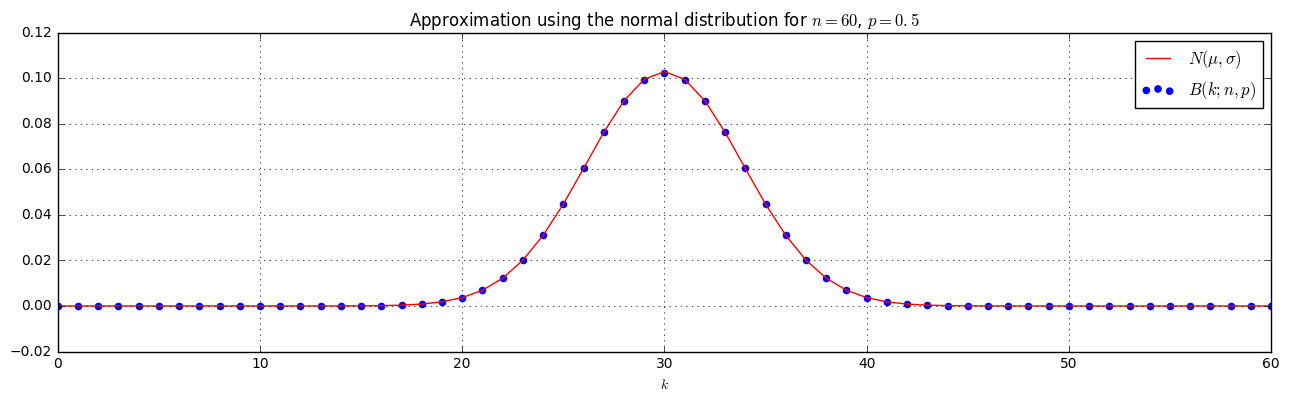

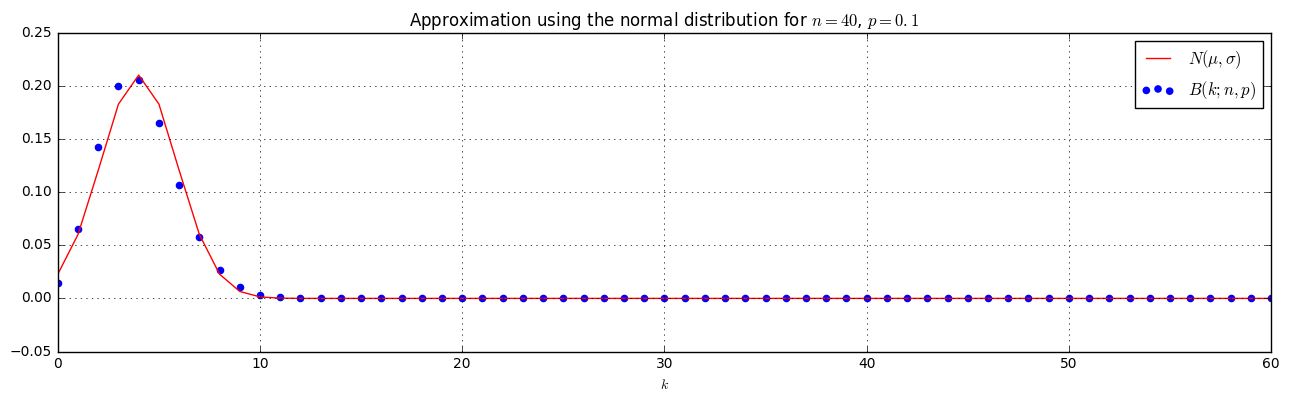

In [167]:
# Exercise 7.3 (b)
def plot_binomial_and_normal(n, p):
    # n trials, k successes, p success probability
    k = np.array(range(int(n * p * 2)))
    ax = scatter(sp.stats.binom(n, p).pmf(ks), enum=True, color='b',
                 label=r'$B(k; n, p)$', xlim=[ks[0], ks[-1]], labels=[r'$k$'])
    my = n * p
    sigma = np.sqrt(n * p * (1-p))
    plot(sp.stats.norm.pdf(ks, my, sigma), ax, enum=True, color='r', label=r'$N(\mu, \sigma)$',
         title=r'Approximation using the normal distribution for $n={}$, $p={}$'.format(n, p))
    ax.legend()

plot_binomial_and_normal(60, 0.5)
plot_binomial_and_normal(40, 0.1)

# - p should be around 0.5 for a good approximation using the normal distribution.
#   Rules of thumb: n*p >= 5 and n*(1-p) >= 5 (otherwise too inaccurate)
# - Discrete (binomial) vs continuous (normal) probability density(!) function:
#   * cumulative prob function (normal) returns the probability of a event in a given area (between a and b)
#   * prob densitity function returns the probability of a event in an infinal small interval (to imitate a discrete function)
# - Normal distribution would be a good approximation for throwing dices because the probability is 0.5
# - A normal distribution for a random variable often consists of multiple uniform distributions.
# The pdf of the sum of independent random variables is calculated by the convolution of the single pdf's.
# If there is a large number of random variable (uniform distributed) and you let n got to infinity
# the pdf of the sum of those variables is a convolution of infinite uniform distributions which is
# equivalent to a normal distribution. Because almost all random processe in nature consist of multiple
# random subprocesses, random processes in nature can be described by a normal distribution.

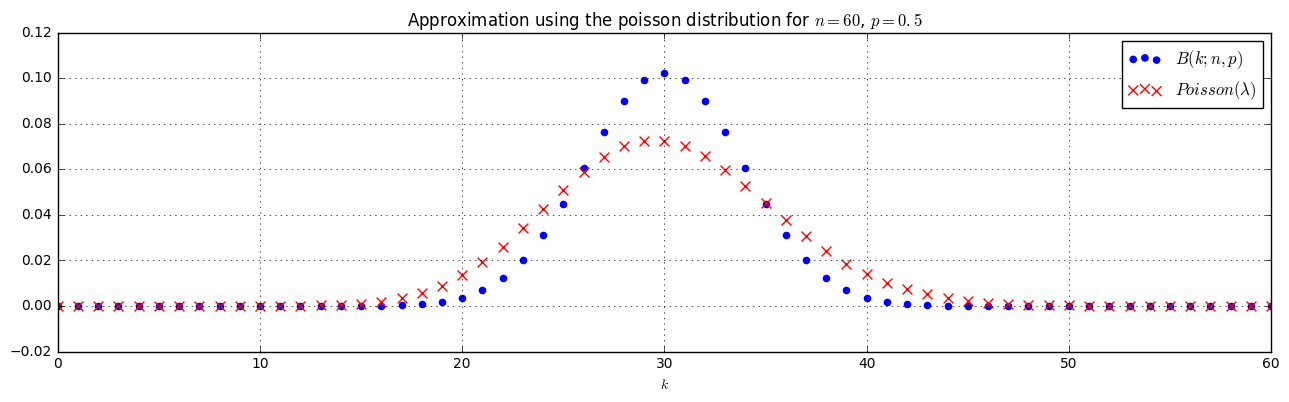

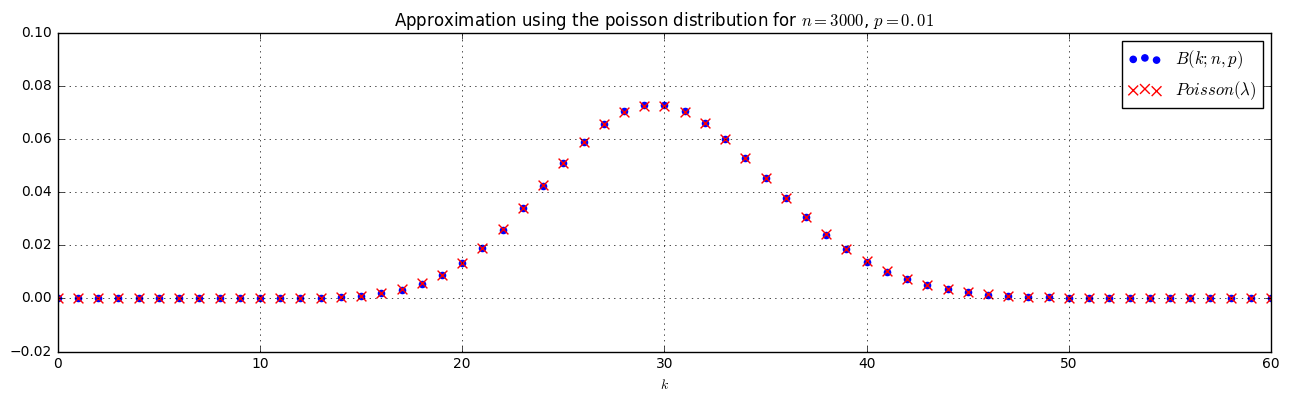

In [196]:
# Exercise 7.3 (c)
def plot_binomial_and_poisson(n, p):
    # n trials, k successes, p success probability
    k = np.array(range(int(n * p * 2)))
    ax = scatter(sp.stats.binom(n, p).pmf(ks), enum=True, color='b',
                 label=r'$B(k; n, p)$', xlim=[ks[0], ks[-1]], labels=[r'$k$'])
    lambda_ = n * p
    sigma = np.sqrt(n * p * (1-p))
    scatter(sp.stats.poisson.pmf(ks, lambda_), ax, enum=True, color='r', label=r'$Poisson(\lambda)$'.format(lambda_),
         title=r'Approximation using the poisson distribution for $n={}$, $p={}$'.format(n, p), marker='x', s=50)
    ax.legend()

plot_binomial_and_poisson(60, 0.5)
plot_binomial_and_poisson(3000, 0.01)

# - Poisson distribution is a good approximation for a high n and low p(n -> inf, p -> 0: Binomial = Poisson)
# - Poisson distribution is also a discrete probability function
# - Bad approximation for throwing dices: only 60 times, p = 0.5 too high